<a href="https://colab.research.google.com/github/BHANAPEESHAN/CNN_Projects_/blob/main/Transfer_Learning_on_birds_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_USERNAME']="bhanapeeshan"
os.environ['KAGGLE_KEY']="646853511eaba7e71ae9a0d4d3c4af8a"
!kaggle datasets download -d gpiosenka/100-bird-species

100% 1.49G/1.49G [00:09<00:00, 126MB/s]
100% 1.49G/1.49G [00:09<00:00, 165MB/s]


In [2]:
from zipfile import ZipFile
file_name = "/content/100-bird-species.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [3]:
import warnings
warnings.filterwarnings('ignore')
data_dir_list=os.listdir("/content/train")
print(data_dir_list)
path,dirs,files=next(os.walk("/content/train"))
file_count=len(files)

['RED NAPED TROGON', 'MALEO', 'KAKAPO', 'NORTHERN PARULA', 'ELLIOTS  PHEASANT', 'RED WINGED BLACKBIRD', 'AMERICAN KESTREL', 'KOOKABURRA', 'BEARDED REEDLING', 'ROBIN', 'COMMON IORA', 'REGENT BOWERBIRD', 'AZURE TANAGER', 'KAGU', 'GREY PLOVER', 'CRESTED CARACARA', 'BLACK-THROATED SPARROW', 'MASKED LAPWING', 'NORTHERN FLICKER', 'VIOLET GREEN SWALLOW', 'BUSH TURKEY', 'YELLOW HEADED BLACKBIRD', 'CROWNED PIGEON', 'BELTED KINGFISHER', 'GREATOR SAGE GROUSE', 'BORNEAN LEAFBIRD', 'TEAL DUCK', 'BORNEAN BRISTLEHEAD', 'GOLDEN EAGLE', 'EMPEROR PENGUIN', 'COLLARED ARACARI', 'ROYAL FLYCATCHER', 'APAPANE', 'RED HONEY CREEPER', 'RED TAILED THRUSH', 'BLACK COCKATO', 'LILAC ROLLER', 'INDIAN BUSTARD', 'GRAY CATBIRD', 'IBISBILL', 'CHUKAR PARTRIDGE', 'STRIPED OWL', 'BANDED PITA', 'GREEN BROADBILL', 'ALEXANDRINE PARAKEET', 'CERULEAN WARBLER', 'INDIGO BUNTING', 'AMERICAN PIPIT', 'NORTHERN MOCKINGBIRD', 'TOUCHAN', 'BARROWS GOLDENEYE', 'BALD IBIS', 'SHORT BILLED DOWITCHER', 'PARAKETT  AKULET', 'ALBATROSS', 'SPANG

In [4]:
import os
import numpy as np
import shutil
import random

In [5]:
file_count

0

In [6]:
len(data_dir_list)

400

In [7]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [8]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [25]:
IH=224
IW=224
batch_size=64

In [26]:
base_model=InceptionV3(include_top=False,weights='imagenet',input_shape=(IH,IW,3))

In [27]:
from tensorflow.keras import Model 

In [28]:
#base_model.summary()

In [29]:
for layer in base_model.layers[:-15]:
    layer.trainable = False

In [30]:
from tensorflow.keras.layers import GlobalAveragePooling2D

In [36]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(400, activation='softmax')(x)
model = Model(base_model.input, output)


model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [37]:
TRAINING_DIR = "/content/train"
train_datagen=ImageDataGenerator(rescale=1/255.0,rotation_range=0.4)
train_gen=train_datagen.flow_from_directory(TRAINING_DIR,
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            target_size=(IH,IW))

Found 58388 images belonging to 400 classes.


In [38]:
VALIDATION_DIR = "/content/valid"
val_datagen=ImageDataGenerator(rescale=1/255.0)
val_gen=val_datagen.flow_from_directory(VALIDATION_DIR,
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            target_size=(IH,IW))

Found 2000 images belonging to 400 classes.


In [18]:
#callbacks=EarlyStopping(monitor='val_loss',patience=5,verbose=1,mode='min')    #'auto'
#bestmodelfile='/content/CNN_aug_best_weights.h5'
#bestmodel=ModelCheckpoint(bestmodelfile,monitor='val_acc',verbose=1,save_best_only=True)

In [39]:
from tensorflow import optimizers
model.compile(optimizer=optimizers.Adam(), 
              loss='binary_crossentropy', 
              metrics =['accuracy'])

In [40]:
history = model.fit_generator(train_gen,epochs=10,verbose=1,validation_data=val_gen)

Epoch 1/10
913/913 [==============================] - 770s 836ms/step - loss: 0.0163 - accuracy: 0.2186 - val_loss: 0.0050 - val_accuracy: 0.6845
Epoch 2/10
913/913 [==============================] - 744s 815ms/step - loss: 0.0061 - accuracy: 0.5874 - val_loss: 0.0033 - val_accuracy: 0.8105
Epoch 3/10
913/913 [==============================] - 750s 821ms/step - loss: 0.0046 - accuracy: 0.7037 - val_loss: 0.0026 - val_accuracy: 0.8635
Epoch 4/10
913/913 [==============================] - 722s 790ms/step - loss: 0.0038 - accuracy: 0.7608 - val_loss: 0.0021 - val_accuracy: 0.8860
Epoch 5/10
913/913 [==============================] - 741s 811ms/step - loss: 0.0033 - accuracy: 0.7985 - val_loss: 0.0019 - val_accuracy: 0.9025
Epoch 6/10
913/913 [==============================] - 760s 832ms/step - loss: 0.0030 - accuracy: 0.8227 - val_loss: 0.0018 - val_accuracy: 0.9135
Epoch 7/10
913/913 [==============================] - 748s 819ms/step - loss: 0.0027 - accuracy: 0.8405 - val_loss: 0.0017 -

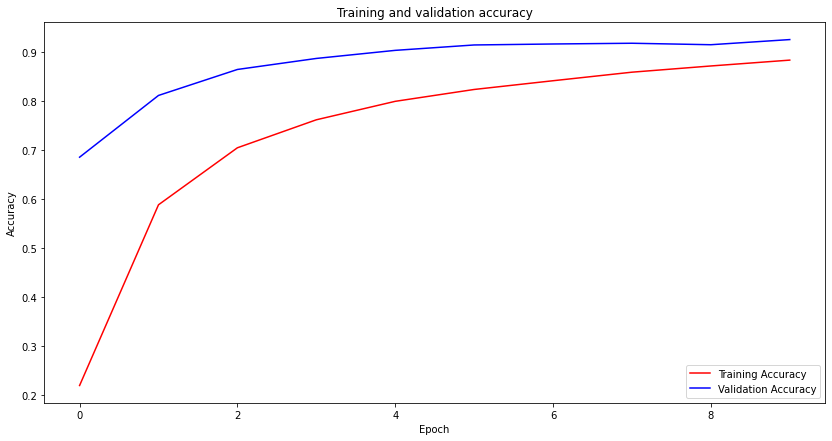

In [42]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

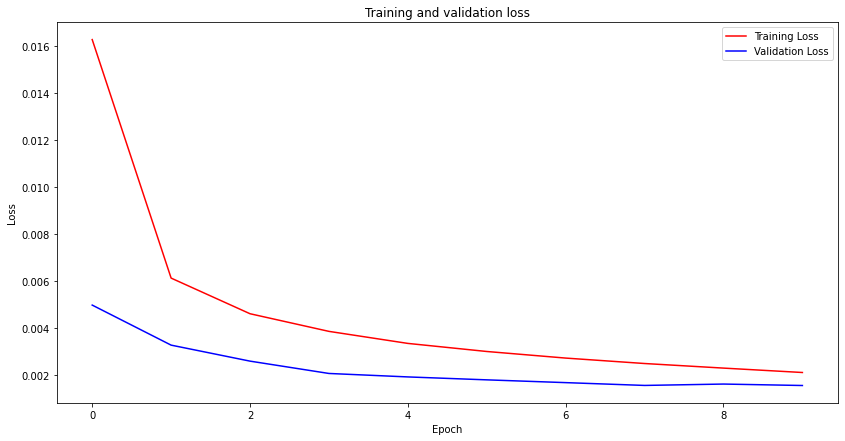

In [43]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')